<a href="https://colab.research.google.com/github/DSabarish/InvestmentAnalysis/blob/main/Investment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Notes

https://medium.com/@hemansnation/11-projects-a-data-analyst-should-build-for-the-finance-domain-as-a-fresher-58bf402823cb

The project ideas mentioned in the article:
  1. Financial modeling
  2. Fraud detection
  3. Risk management
  4. Credit risk analysis
  5. Performance reporting
  6. Market analysis
  7. Customer segmentation
  8. Investment analysis
  9. Budget forecasting
  10. Product pricing analysis
  11. Compliance monitoring



8. Investment analysis
https://www.youtube.com/watch?v=sAyj_qopxHg
https://www.kaggle.com/code/ashydv/investment-opportunity-analysis-eda?source=post_page-----58bf402823cb--------------------------------


SyntaxError: invalid decimal literal (<ipython-input-5-1743a873dc14>, line 3)

># **8. Investment analysis**





## Investment Analysis

This analysis is for a Spark Funds case study that analyzes data and derives insightful trends.

Spark Funds make investments in various companies.

The CEO of Spark Funds wants to **understand global investment trends** to make effective investment decisions.

The **objective** is to identify the **best sectors, countries, and suitable investment types**

The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.

Spark Funds has two minor constraints for investments:

1. It wants to invest between **5 to 15 million USD** per round of investment.
2. It wants to invest only in **English-speaking countries** because of the ease of communication with the invested companies.


#Importing Packages

In [ ]:
import pandas as pd
import numpy as np

#Loading Files as DataFrame

In [ ]:
Companies = "https://raw.githubusercontent.com/DSabarish/InvestmentAnalysis/main/companies.txt"
Rounds2 = "https://raw.githubusercontent.com/DSabarish/InvestmentAnalysis/main/rounds2.csv"

C = pd.read_csv(Companies, sep='\t', encoding='ISO-8859-1')
R = pd.read_csv(Rounds2, encoding='ISO-8859-1')

#Data Quality Exploration

In [ ]:
def DataQuality_stats(df):
    # print("FileName")
    print("Rows:", df.shape[0])
    print("Columns:", df.shape[1])
    print("Data Quality:")
    stats = pd.DataFrame({
        '#Rows': df.shape[0],
        '#Unique Values': df.nunique(),
        '#Null Values': df.isnull().sum(),
        '%Null Values': round((df.isnull().mean() * 100), 2)
    })

    return stats

In [ ]:
print("Company File")
DataQuality_stats(C)

Company File
Rows: 66368
Columns: 10
Data Quality:


,#Rows,#Unique Values,#Null Values,%Null Values
permalink,66368,66368,0,0.00
name,66368,66102,1,0.00
homepage_url,66368,61191,5058,7.62
category_list,66368,27296,3148,4.74
status,66368,4,0,0.00
country_code,66368,137,6958,10.48
state_code,66368,311,8547,12.88
region,66368,1092,8030,12.10
city,66368,5111,8028,12.10
founded_at,66368,3978,15221,22.93


In [ ]:
print("Round2 File")
DataQuality_stats(R)

Round2 File
Rows: 114949
Columns: 6
Data Quality:


,#Rows,#Unique Values,#Null Values,%Null Values
company_permalink,114949,90247,0,0.00
funding_round_permalink,114949,114949,0,0.00
funding_round_type,114949,14,0,0.00
funding_round_code,114949,8,83809,72.91
funded_at,114949,5033,0,0.00
raised_amount_usd,114949,22095,19990,17.39


In [ ]:
# Lowercase 'permalink' column in DataFrame C
C['permalink'] = C['permalink'].str.lower()


# Rename 'company_permalink' column to 'permalink' and the lowercasing its values in DataFrame R
R = R.rename(columns={'company_permalink': 'permalink'})
R['permalink'] = R['permalink'].str.lower()


# Perform a left join between DataFrames C and R:
# Merging C and R DataFrames using 'permalink' column as the join key,
# retaining all rows from C and including matching rows from R, with NaN values where there are no matches in R.
merged_df = pd.merge(C, R, how='left', on='permalink')

# Display the resulting DataFrame:
merged_df.head()



,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [ ]:
print("Merged Dataframe")
DataQuality_stats(merged_df)

Merged Dataframe
Rows: 114947
Columns: 15
Data Quality:


,#Rows,#Unique Values,#Null Values,%Null Values
permalink,114947,66368,0,0.00
name,114947,66102,1,0.00
homepage_url,114947,61191,6134,5.34
category_list,114947,27296,3409,2.97
status,114947,4,0,0.00
country_code,114947,137,8676,7.55
state_code,114947,311,10944,9.52
region,114947,1092,10165,8.84
city,114947,5111,10162,8.84
founded_at,114947,3978,20521,17.85


In [ ]:
# Cleaning data by removing unnecessary columns
columns_to_drop = ['funded_at', 'founded_at', 'funding_round_permalink', 'funding_round_code', 'homepage_url', 'state_code', 'region', 'city']
merged_df = merged_df.drop(columns=columns_to_drop, axis=1)

In [ ]:
# Cleaning data > Remove rows with missing values

# 'raised_amount_usd' column with 17.39% missing values
merged_df = merged_df[pd.notnull(merged_df['raised_amount_usd'])]

# 'country_code' column with 7.55% missing values
# This ensures we exclude rows without country code information, necessary for geographical analysis
merged_df = merged_df[pd.notnull(merged_df['country_code'])]

# 'category_list' column with 2.97% missing values
# This ensures we exclude rows without category list information, necessary for sector-wise analysis
merged_df = merged_df[pd.notnull(merged_df['category_list'])]

# Display the cleaned master_frame DataFrame
print("Cleaned merged_df:")
merged_df.head()


Cleaned merged_df:


,permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,venture,10000000.0
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,seed,700000.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,venture,2000000.0
6,/organization/01games-technology,01Games Technology,Games,operating,HKG,undisclosed,41250.0
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,seed,43360.0


In [ ]:
# Extracting the primary sector as the first element of every value (separated by '|') of a cell
merged_df['primary_sector'] = merged_df['category_list'].apply(lambda v: v.split('|')[0].lower())

# Displaying the 'primary_sector' column
print(merged_df['primary_sector'].head())


0                    media
2    application platforms
4              curated web
6                    games
7            biotechnology
Name: primary_sector, dtype: object


In [ ]:
print("Cleaned merged_df:")
DataQuality_stats(merged_df)

Cleaned merged_df:
Rows: 88528
Columns: 8
Data Quality:


,#Rows,#Unique Values,#Null Values,%Null Values
permalink,88528,48729,0,0.0
name,88528,48599,1,0.0
category_list,88528,21316,0,0.0
status,88528,4,0,0.0
country_code,88528,134,0,0.0
funding_round_type,88528,14,0,0.0
raised_amount_usd,88528,20693,0,0.0
primary_sector,88528,708,0,0.0


In [ ]:
round_names = R['funding_round_type'].unique()

print(round_names)

['venture' 'seed' 'undisclosed' 'equity_crowdfunding' 'convertible_note'
 'private_equity' 'debt_financing' 'angel' 'grant' 'secondary_market'
 'post_ipo_equity' 'post_ipo_debt' 'product_crowdfunding'
 'non_equity_assistance']


# Explanation:

| Funding Round Type   | Description                                                                                        |
|----------------------|----------------------------------------------------------------------------------------------------|
| Venture              | Funding for new and growing companies with big ideas.                                              |
| Seed                 | Early funding to help start a business or develop a product.                                        |
| Undisclosed          | Funding where details are not publicly shared.                                                      |
| Equity Crowdfunding | Money raised from many people in exchange for a stake in the company.                               |
| Convertible Note     | Short-term loan that can be converted into ownership in the future.                                 |
| Private Equity       | Investment in established companies looking to grow or restructure.                                 |
| Debt Financing       | Borrowing money that needs to be repaid with interest.                                              |
| Angel                | Investment from wealthy individuals who believe in a startup's potential.                            |
| Grant                | Free money awarded for specific projects or initiatives.                                             |
| Secondary Market     | Buying and selling existing shares between investors.                                               |
| Post IPO Equity      | Funds raised by a company selling shares after going public.                                         |
| Post IPO Debt        | Debt taken on by a company after becoming publicly traded.                                           |
| Product Crowdfunding | Money raised from the public for creating a new product.                                             |
| Non-equity Assistance| Help given without expecting ownership in return, like loans or grants.                              |


In [ ]:
# export merged_df to csv

merged_df.to_csv('Cleaned_Investment_data.csv')


In [ ]:
# Grouping the master_frame DataFrame by 'funding_round_type'
funding_round_type_group = merged_df.groupby('funding_round_type')

# Calculating the average investment amount for each funding round type
avg_fund = funding_round_type_group['raised_amount_usd'].mean().sort_values(ascending=False).astype(int)

# Displaying the average investment amount for each funding round type
avg_fund


funding_round_type
post_ipo_debt            169451789
secondary_market          84438532
private_equity            73938486
post_ipo_equity           66077058
debt_financing            17167653
undisclosed               15891661
venture                   11724222
grant                      4515024
product_crowdfunding       1353226
convertible_note           1337186
angel                       971573
seed                        747793
equity_crowdfunding         509897
non_equity_assistance       480753
Name: raised_amount_usd, dtype: int64

<ipython-input-20-32a19715b473>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_fund.index, y=avg_fund.values, palette='viridis')


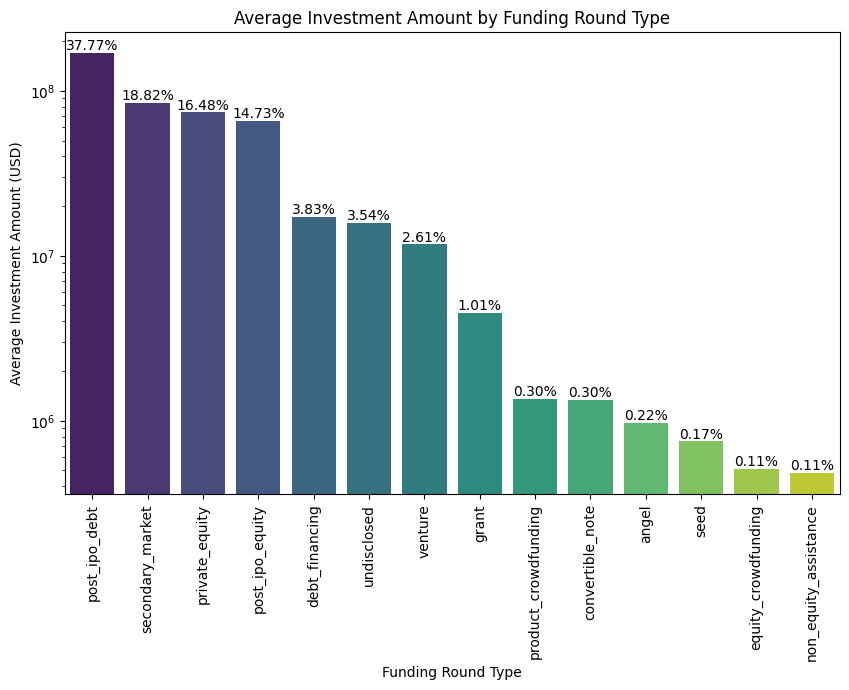

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot with log scale for y-axis
ax = sns.barplot(x=avg_fund.index, y=avg_fund.values, palette='viridis')
plt.yscale('log')  # Set log scale for y-axis

# Set plot labels and title
plt.title('Average Investment Amount by Funding Round Type')
plt.xlabel('Funding Round Type')
plt.ylabel('Average Investment Amount (USD)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add percentage labels
total = sum(avg_fund.values)
for i, val in enumerate(avg_fund.values):
    plt.text(i, val, f'{(val/total)*100:.2f}%', color='black', ha='center', va='bottom')

# Show the plot
plt.show()


<ipython-input-21-7e864b98e7db>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_fund.index, y=avg_fund.values, palette='viridis')


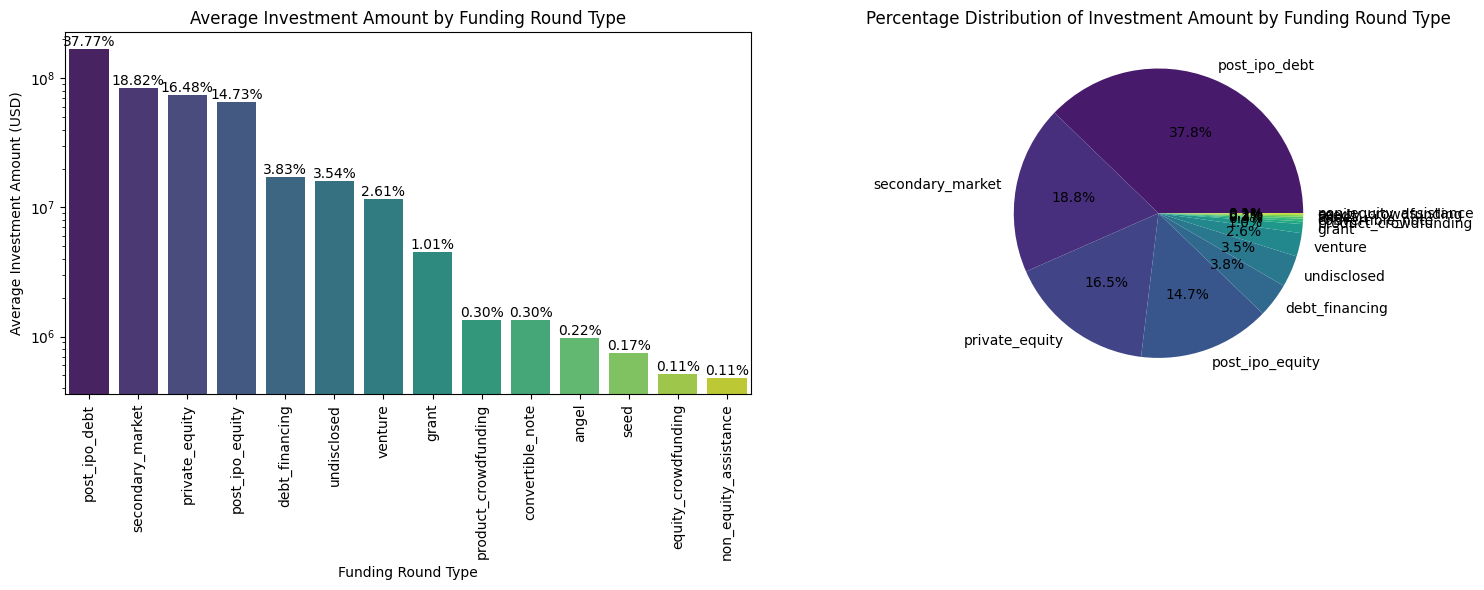

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(16, 6))

# Create a bar plot with log scale for y-axis
plt.subplot(1, 2, 1)
ax = sns.barplot(x=avg_fund.index, y=avg_fund.values, palette='viridis')
plt.yscale('log')  # Set log scale for y-axis
plt.title('Average Investment Amount by Funding Round Type')
plt.xlabel('Funding Round Type')
plt.ylabel('Average Investment Amount (USD)')
plt.xticks(rotation=90)

# Add percentage labels
total = sum(avg_fund.values)
for i, val in enumerate(avg_fund.values):
    plt.text(i, val, f'{(val/total)*100:.2f}%', color='black', ha='center', va='bottom')

# Create a pie chart
plt.subplot(1, 2, 2)
plt.pie(avg_fund.values, labels=avg_fund.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(avg_fund)))
plt.title('Percentage Distribution of Investment Amount by Funding Round Type')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


# Filter1 Based on Criteriea of Fund monetary Value

In [ ]:
# Set lower and upper limits for the average investment amount
lower_limit = 5e6  # LL: 5 Million in USD
upper_limit = 15e6  # UP: 15 Million in USD

# Filter funding round types based on the limits
filtered_types = avg_fund.loc[(avg_fund >= lower_limit) & (avg_fund <= upper_limit)]

# Display the funding round types
print("Funding Round Types within the specified range:")
filtered_types_list = [i for i in filtered_types.index]
filtered_types_list


Funding Round Types within the specified range:


['venture']

In [ ]:
# Filter merged_df for records where funding_round_type is in filtered_types_list
Filter1 = merged_df[merged_df['funding_round_type'].isin(filtered_types_list)]

# Display a random sample of 100 rows from filtered_merged_df
Filter1.sample(n=5)


,permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd,primary_sector
105478,/organization/uzabase,Uzabase,Information Technology,operating,JPN,venture,4500000.0,information technology
89017,/organization/shopsavvy,ShopSavvy,Mobile|Shopping,operating,USA,venture,5000000.0,mobile
19941,/organization/citizengine,Citizengine,Software,operating,USA,venture,762499.0,software
22314,/organization/communications-infrastructure-in...,COMMUNICATIONS INFRASTRUCTURE INVESTMENTS,Business Services|Communications Infrastructur...,operating,USA,venture,33463229.0,business services
18392,/organization/cemaphore-systems,Cemaphore Systems,Curated Web,acquired,USA,venture,10000000.0,curated web


In [ ]:
print("Filter1 Applied to merged_df:")
DataQuality_stats(Filter1)

Filter1 Applied to merged_df:
Rows: 47809
Columns: 8
Data Quality:


,#Rows,#Unique Values,#Null Values,%Null Values
permalink,47809,27332,0,0.0
name,47809,27292,0,0.0
category_list,47809,9946,0,0.0
status,47809,4,0,0.0
country_code,47809,97,0,0.0
funding_round_type,47809,1,0,0.0
raised_amount_usd,47809,11978,0,0.0
primary_sector,47809,603,0,0.0


# Web Scraping for English Speaking Countries

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the Wikipedia page containing the table
# Send a GET request to the URL
# Parse the HTML content of the page
# Find the table on the page
url = 'https://en.wikipedia.org/wiki/List_of_countries_and_territories_where_English_is_an_official_language'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table', {'class': 'wikitable'})

# Extract data from the table
data = []
for row in table.find_all('tr'):
    cells = row.find_all(['th', 'td'])
    if cells:
        country = cells[0].text.strip()
        code = cells[1].text.strip()
        data.append([country, code])


##################@@@@@ eng_country['Code']
# Create a DataFrame from the extracted data
# eng_country = pd.DataFrame(data, columns=['Country', 'Code'])
# eng_country.head(1000)

eng_country=['AUS','NZL','GBR','USA','ATG','BHS','BRB','BLZ','BWA','BDI','CMR','CAN','COK','DMA','SWZ','FJI','GMB','GHA','GRD','GUY','IND','IRL','JAM','KEN','KIR','LSO','LBR','MWI','MLT','MHL','MUS','FSM','NAM','NRU','NGA','NIU','PAK','PLW','PNG','PHL','RWA','KNA','LCA','VCT','WSM','SYC','SLE','SGP','SLB','ZAF','SSD','SDN','TZA','TON','TTO','TUV','UGA','VUT','ZMB','ZWE']



In [ ]:
# Filter only the English-speaking countries from Filter1 DataFrame
english_speaking_countries = Filter1[Filter1['country_code'].isin(eng_country)]   ##################@@@@@ eng_country['Code']

# Group by country_code, sum raised_amount_usd, and sort in descending order
total_investment_by_country = english_speaking_countries.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)

# Select the top 10 country codes along with their corresponding raised_amount_usd
top_10_country_investments = total_investment_by_country.head(10)

# Display the top 10 country codes and their raised_amount_usd
print("Top 10 English-Speaking Country Codes by Total Investment (USD):")
top_10_country_investments

Top 10 English-Speaking Country Codes by Total Investment (USD):


country_code
USA    4.200680e+11
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
SGP    2.793918e+09
IRL    1.669286e+09
AUS    1.319029e+09
NZL    4.483164e+08
ZAF    2.337131e+08
NGA    1.834400e+08
Name: raised_amount_usd, dtype: float64

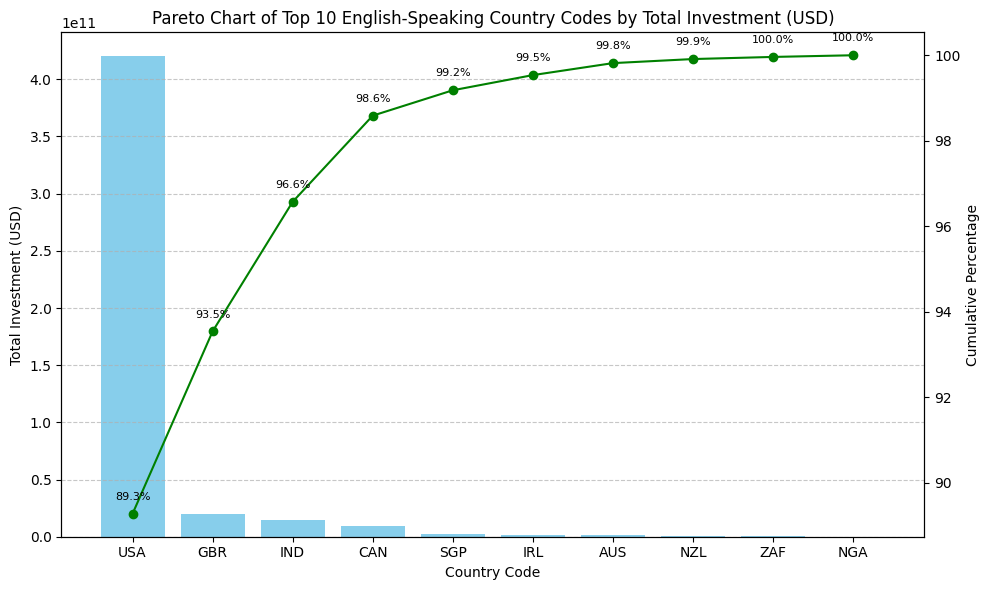

In [ ]:
import matplotlib.pyplot as plt

# Calculate the cumulative percentage of total investment
cumulative_percentage = top_10_country_investments.cumsum() / top_10_country_investments.sum() * 100

# Plotting the Pareto chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for individual contributions
ax1.bar(top_10_country_investments.index, top_10_country_investments, color='skyblue')
ax1.set_xlabel('Country Code')
ax1.set_ylabel('Total Investment (USD)', color='black')  # Change color here
ax1.tick_params(axis='y', colors='black')  # Change color here

# Secondary y-axis for cumulative percentage
ax2 = ax1.twinx()
ax2.plot(top_10_country_investments.index, cumulative_percentage, color='green', marker='o', linestyle='-')
ax2.set_ylabel('Cumulative Percentage', color='black')  # Change color here
ax2.tick_params(axis='y', colors='black')  # Change color here

# Adding cumulative percentage labels
for i, perc in enumerate(cumulative_percentage):
    ax2.annotate(f'{perc:.1f}%', (top_10_country_investments.index[i], perc),
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

# Adding gridlines
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Title and labels
plt.title('Pareto Chart of Top 10 English-Speaking Country Codes by Total Investment (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Filter Filter1 based on whether country_code is in the top 10 English-speaking countries
filtered_by_top_investments = Filter1[Filter1['country_code'].isin(top_10_country_investments.index)]

# Display the filtered DataFrame
print("Filtered DataFrame based on Top 10 English-Speaking Country Codes:")
filtered_by_top_investments


Filtered DataFrame based on Top 10 English-Speaking Country Codes:


,permalink,name,category_list,status,country_code,funding_round_type,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,Media,operating,IND,venture,10000000.0,media
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,venture,719491.0,biotechnology
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,venture,20000000.0,analytics
11,/organization/0xdata,H2O.ai,Analytics,operating,USA,venture,1700000.0,analytics
12,/organization/0xdata,H2O.ai,Analytics,operating,USA,venture,8900000.0,analytics
...,...,...,...,...,...,...,...,...
114918,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,venture,12000000.0,biotechnology
114920,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,venture,14219999.0,biotechnology
114921,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,venture,555016.0,biotechnology
114932,/organization/zyrra,Zyrra,E-Commerce,operating,USA,venture,140500.0,e-commerce


In [ ]:
DataQuality_stats(filtered_by_top_investments)

Rows: 40780
Columns: 8
Data Quality:


,#Rows,#Unique Values,#Null Values,%Null Values
permalink,40780,22445,0,0.0
name,40780,22415,0,0.0
category_list,40780,8326,0,0.0
status,40780,4,0,0.0
country_code,40780,10,0,0.0
funding_round_type,40780,1,0,0.0
raised_amount_usd,40780,9666,0,0.0
primary_sector,40780,573,0,0.0


In [ ]:
# 14 mins

To explain the differences between venture capital, seed funding, and private equity in an Excel table format, you can create a table with columns for each type of funding and rows for their key characteristics. Here's how you could structure the table:

| Characteristic          | Venture Capital | Seed Funding   | Private Equity |
|-------------------------|-----------------|----------------|----------------|
| Stage of Company        | Early-stage     | Early-stage    | Mature         |
| Investment Size         | Moderate to large | Small to moderate | Large           |
| Company Development     | High-growth potential | Early development | Established     |
| Investor Requirements  | High potential for ROI | Growth potential | Profitability, cash flow |
| Equity Ownership       | Equity stake in exchange for funding | Equity stake or convertible debt | Equity stake or control |
| Typical Sector Focus   | Technology, biotech, high-growth industries | Varied | Varied, often non-tech sectors |
| Risk Level             | High            | High           | Moderate to High |
| Investment Timeline    | Medium to Long-term | Short to Medium-term | Medium to Long-term |
| Exit Strategy Options  | IPO, acquisition | Acquisition, next funding round | IPO, sale to another company, recapitalization |

This table provides a comparison of the key differences between venture capital, seed funding, and private equity across various aspects such as stage of company, investment size, investor requirements, risk level, and exit strategy options. It can help understand how each type of funding differs in terms of their target companies, investment strategies, and objectives.